# Customer Retention Project

Steps performed in EDA :
1. Import necessary packages.
2. Understand data structure.
3. Clean the Data.
4. Desrciptive Analysis.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install plotly

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from  sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [4]:
#Importing the dataset
df = pd.read_excel('customer_retention_dataset.xlsx','datasheet')
encoded_df = pd.read_excel('customer_retention_dataset.xlsx','codedsheet')

In [5]:
#Checking shape of dataset
print('Original Data :', df.shape)
print('Encoded Data :', encoded_df.shape)

Original Data : (269, 71)
Encoded Data : (269, 71)


In [6]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [7]:
encoded_df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [8]:
#Checking the data types of all columns
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [9]:
# Checking column names
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [10]:
# Let's rename the new column names to the original datastes for better understanding
columns = ['gender','age','city','pinCode','shoppingSince','shoppingFrequency','internetAccessibility','deviceUsed',
           'screenSize','OS', 'browserUsed','channelFirstUsed','loginMode','timeSpentDeciding','paymentMode','cancellingFrequency',
          'cancellationReason','contentReadability','similarProductInfo','sellerProductInfo','productInfoClarity','navigationEase',
          'loadingProcessingSpeed','userFrienlyInterface','conveninetPaymentMode','timelyFulfilmentTrust','custSupportResponse',
          'custPrivacyGuarantee','variousChannelResponses','benefit','enjoy','convenience','returnReplacementPolicy','loyaltyProgramsAccess',
          'infoSatisfaction','siteQualitySatisfaction','netBenefitSatisfaction','trust','productSeveralCategory','relevantProductInfo','monetarySavings',
          'patronizingConvenience','adventureSense','socialStatus','gratification','roleFulfilment','moneyWorthy','shoppedFrom','easyWebApp',
           'visuallyAppealingWebApp','productVariety','completeProductInfo','fastWebApp','reliableWebApp','quickPurchase','paymentOptionsAvailability',
           'fastDelivery','custInfoPrivacy','finInfoSecurity','perceivedTrustworthiness','multiChannelAssistance','longLoginTime','longDisplayTime',
           'latePriceDeclare','longLoadingTime','limitedPaymentMode','lateDelivery','webAppDesignChange','pageDisruption','webAppEfficiency',
           'recommendation']

df.columns = columns
encoded_df.columns = columns

In [11]:
df.head()

,gender,age,city,pinCode,shoppingSince,shoppingFrequency,internetAccessibility,deviceUsed,screenSize,OS,...,longLoginTime,longDisplayTime,latePriceDeclare,longLoadingTime,limitedPaymentMode,lateDelivery,webAppDesignChange,pageDisruption,webAppEfficiency,recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [12]:
# Let's replace the redundant values
df.replace('indifferent (3)','Indifferent (3)',inplace=True)
df.replace('indifferent  (3)','Indifferent (3)',inplace=True)
df.replace('Dis-agree (2)','Disagree (2)',inplace=True)


In [13]:
#Checking dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    object
 1   age                         269 non-null    object
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    object
 5   shoppingFrequency           269 non-null    object
 6   internetAccessibility       269 non-null    object
 7   deviceUsed                  269 non-null    object
 8   screenSize                  269 non-null    object
 9   OS                          269 non-null    object
 10  browserUsed                 269 non-null    object
 11  channelFirstUsed            269 non-null    object
 12  loginMode                   269 non-null    object
 13  timeSpentDeciding           269 non-null    object

In [14]:
# Checking encoded dataset info.
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    int64 
 1   age                         269 non-null    int64 
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    int64 
 5   shoppingFrequency           269 non-null    int64 
 6   internetAccessibility       269 non-null    int64 
 7   deviceUsed                  269 non-null    int64 
 8   screenSize                  269 non-null    int64 
 9   OS                          269 non-null    int64 
 10  browserUsed                 269 non-null    int64 
 11  channelFirstUsed            269 non-null    int64 
 12  loginMode                   269 non-null    int64 
 13  timeSpentDeciding           269 non-null    int64 

In [15]:
#Checking null values in dataset
df.isnull().sum()

gender                0
age                   0
city                  0
pinCode               0
shoppingSince         0
                     ..
lateDelivery          0
webAppDesignChange    0
pageDisruption        0
webAppEfficiency      0
recommendation        0
Length: 71, dtype: int64

The dataset does not contain Null values.

In [16]:
#Checking unique values of each columns
df.nunique()

gender                 2
age                    5
city                  11
pinCode               39
shoppingSince          5
                      ..
lateDelivery           6
webAppDesignChange     7
pageDisruption         8
webAppEfficiency       8
recommendation         8
Length: 71, dtype: int64

In [17]:
# Let's check the  categorical and continuos variables in our dataset

categorical=[x for x in df.columns if df[x].dtype==object]
print(len(categorical))
continous=[x for x in df.columns if x not in categorical]
print(len(continous))

70
1


We can observe that we have only one numeral datatype rest all are catagoriacal datatypes.

In [18]:
# Check the statistical data
df.describe()

,pinCode
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [19]:
# check describe the object types

df.describe(include='object')

,gender,age,city,shoppingSince,shoppingFrequency,internetAccessibility,deviceUsed,screenSize,OS,browserUsed,...,longLoginTime,longDisplayTime,latePriceDeclare,longLoadingTime,limitedPaymentMode,lateDelivery,webAppDesignChange,pageDisruption,webAppEfficiency,recommendation
count,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,269,269,269,269,269
unique,2,5,11,5,6,4,4,4,3,4,...,10,10,8,11,8,6,7,8,8,8
top,Female,31-40 years,Delhi,Above 4 years,Less than 10 times,Mobile internet,Smartphone,Others,Window/windows Mobile,Google chrome,...,Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Snapdeal.com,Paytm.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
freq,181,81,58,98,114,142,141,134,122,216,...,57,60,75,61,87,72,96,53,94,79


# Data Visualization

# Univariate Analysis

Using Set_Style and countplot:

In [20]:
def bia_vari(a):
    plt.figure(figsize=(8,6))
    sns.set_style('darkgrid')
    sns.lineplot(x='Which__of__the__Indian__online__retailer__would__you__recommend__to__a__friend',y=a,data=df,markers=False)
    plt.xticks(rotation=90)
    plt.show()

Female    181
Male       88
Name: gender, dtype: int64


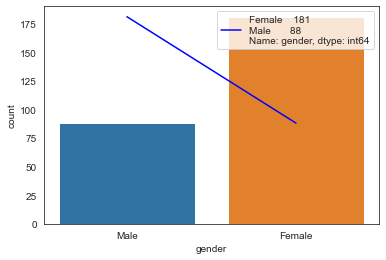

*******************************************************************************


31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64


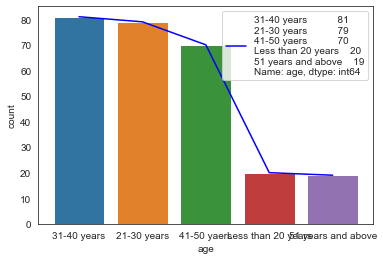

*******************************************************************************


Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64


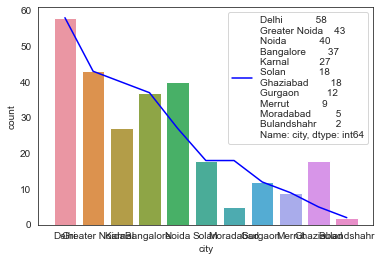

*******************************************************************************


Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: shoppingSince, dtype: int64


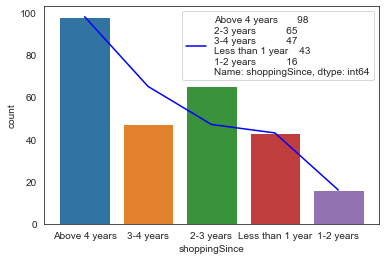

*******************************************************************************


Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: shoppingFrequency, dtype: int64


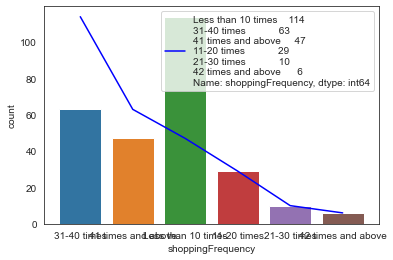

*******************************************************************************


Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: internetAccessibility, dtype: int64


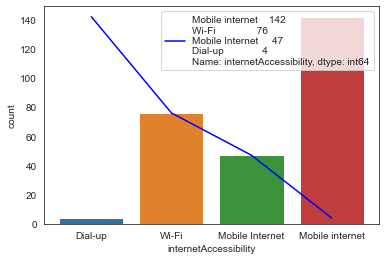

*******************************************************************************


Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: deviceUsed, dtype: int64


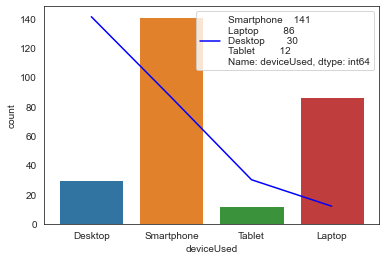

*******************************************************************************


Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: screenSize, dtype: int64


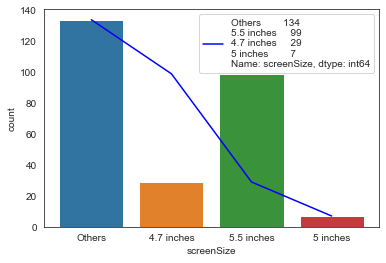

*******************************************************************************


Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


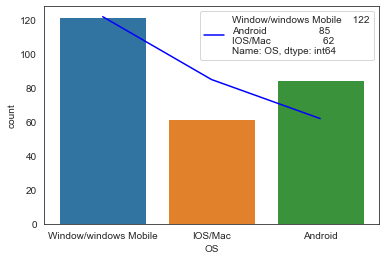

*******************************************************************************


Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: browserUsed, dtype: int64


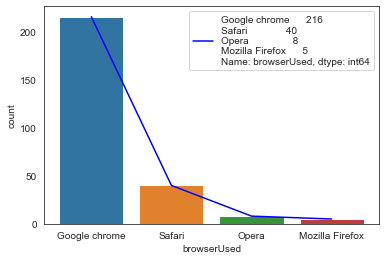

*******************************************************************************


Search Engine        230
Content Marketing     20
Display Adverts       19
Name: channelFirstUsed, dtype: int64


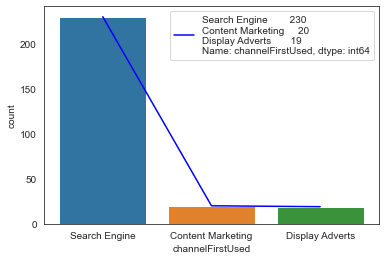

*******************************************************************************


Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: loginMode, dtype: int64


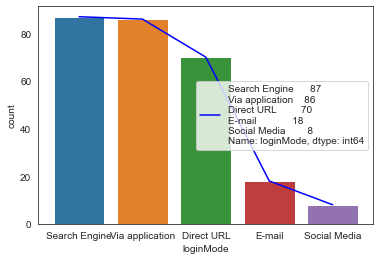

*******************************************************************************


more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: timeSpentDeciding, dtype: int64


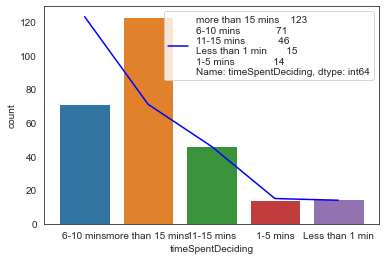

*******************************************************************************


Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: paymentMode, dtype: int64


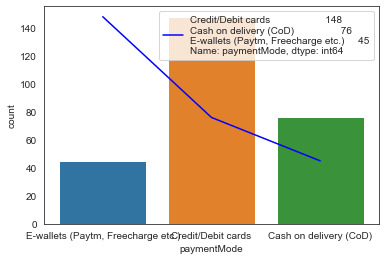

*******************************************************************************


Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: cancellingFrequency, dtype: int64


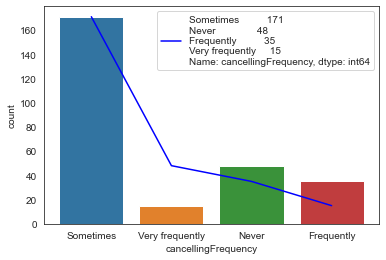

*******************************************************************************


Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: cancellationReason, dtype: int64


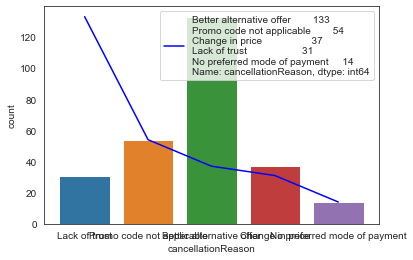

*******************************************************************************


Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: contentReadability, dtype: int64


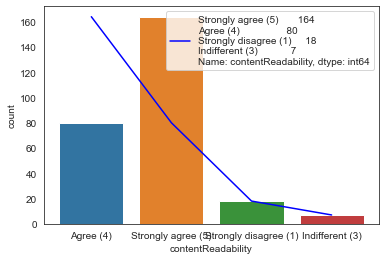

*******************************************************************************


Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Disagree (2)           18
Name: similarProductInfo, dtype: int64


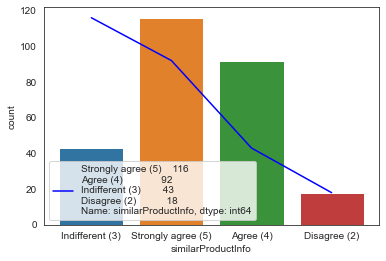

*******************************************************************************


Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Disagree (2)              18
Strongly disagree (1)     11
Name: sellerProductInfo, dtype: int64


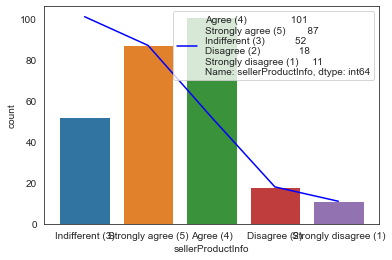

*******************************************************************************


Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Disagree (2)              12
Name: productInfoClarity, dtype: int64


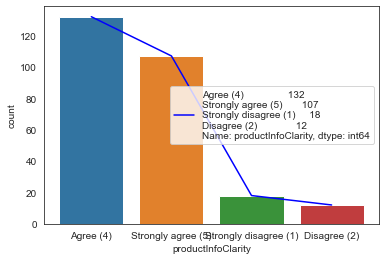

*******************************************************************************


Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Disagree (2)               5
Name: navigationEase, dtype: int64


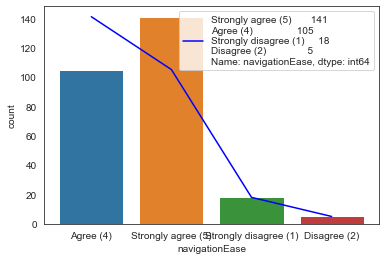

*******************************************************************************


Strongly agree (5)       115
Agree (4)                112
Disagree (2)              18
Strongly disagree (1)     12
Indifferent (3)           12
Name: loadingProcessingSpeed, dtype: int64


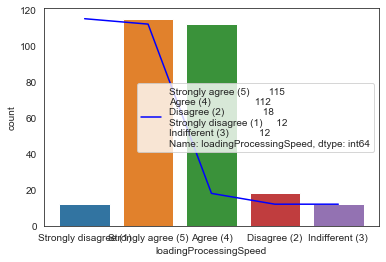

*******************************************************************************


Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Disagree (2)              12
Indifferent (3)            5
Name: userFrienlyInterface, dtype: int64


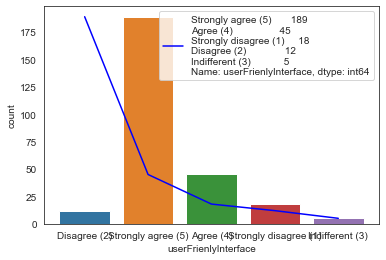

*******************************************************************************


Strongly agree (5)    159
Agree (4)              80
Disagree (2)           30
Name: conveninetPaymentMode, dtype: int64


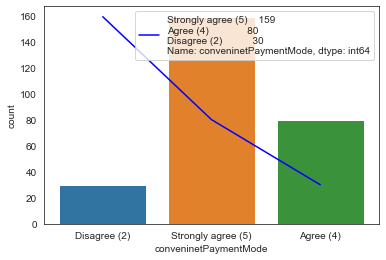

*******************************************************************************


Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
Indifferent (3)        12
Name: timelyFulfilmentTrust, dtype: int64


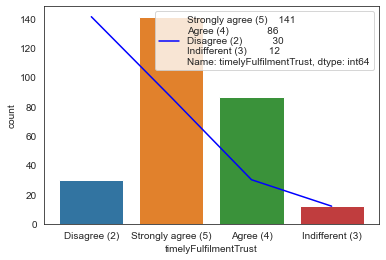

*******************************************************************************


Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
Indifferent (3)           15
Name: custSupportResponse, dtype: int64


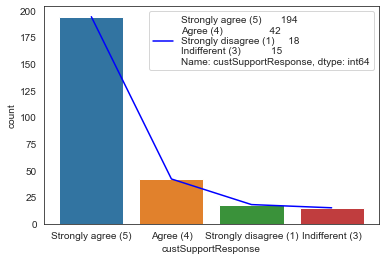

*******************************************************************************


Strongly agree (5)    185
Agree (4)              58
Indifferent (3)        26
Name: custPrivacyGuarantee, dtype: int64


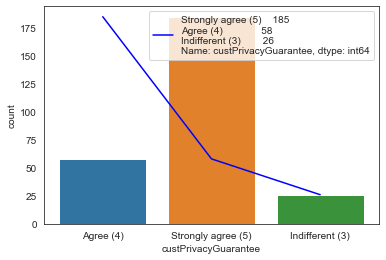

*******************************************************************************


Strongly agree (5)       149
Agree (4)                 94
Indifferent (3)           15
Strongly disagree (1)     11
Name: variousChannelResponses, dtype: int64


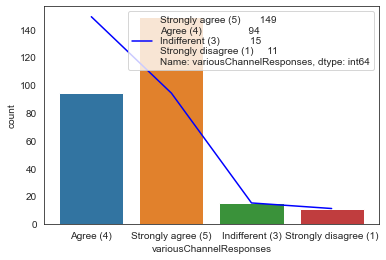

*******************************************************************************


Strongly agree (5)       105
Agree (4)                 85
Indifferent (3)           50
Strongly disagree (1)     18
Disagree (2)              11
Name: benefit, dtype: int64


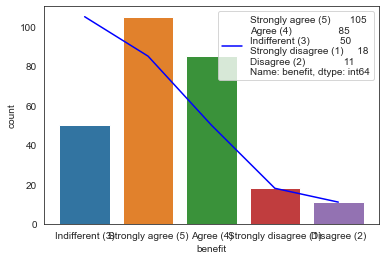

*******************************************************************************


Strongly agree (5)       86
Indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Disagree (2)             19
Name: enjoy, dtype: int64


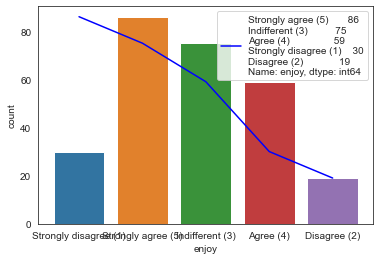

*******************************************************************************


Strongly agree (5)    146
Agree (4)              78
Indifferent (3)        33
Disagree (2)           12
Name: convenience, dtype: int64


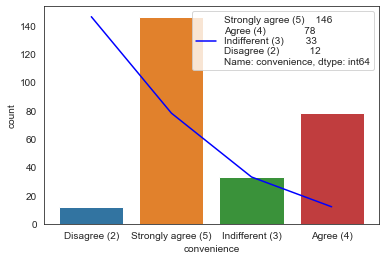

*******************************************************************************


Strongly agree (5)    198
Agree (4)              51
Disagree (2)           20
Name: returnReplacementPolicy, dtype: int64


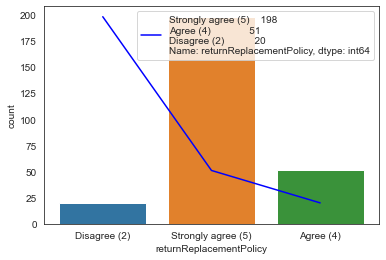

*******************************************************************************


Strongly agree (5)       115
Agree (4)                 64
Indifferent (3)           64
Disagree (2)              15
Strongly disagree (1)     11
Name: loyaltyProgramsAccess, dtype: int64


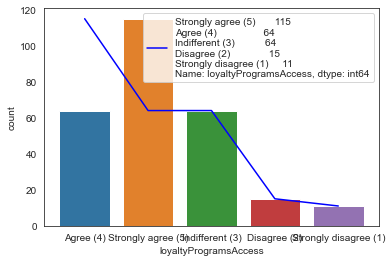

*******************************************************************************


Strongly agree (5)    133
Agree (4)              80
Indifferent (3)        56
Name: infoSatisfaction, dtype: int64


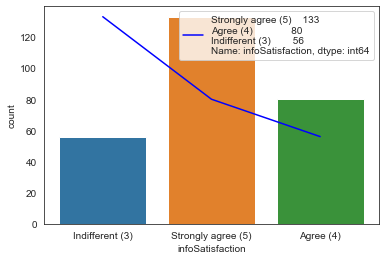

*******************************************************************************


Strongly agree (5)    175
Agree (4)              86
Disagree (2)            8
Name: siteQualitySatisfaction, dtype: int64


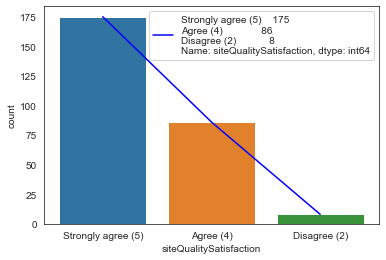

*******************************************************************************


Strongly agree (5)    164
Agree (4)              54
Indifferent (3)        40
Disagree (2)           11
Name: netBenefitSatisfaction, dtype: int64


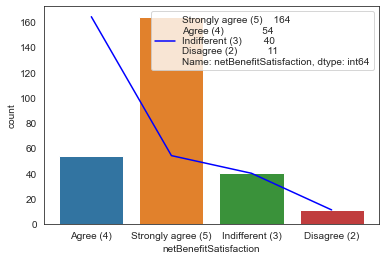

*******************************************************************************


Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Disagree (2)               7
Indifferent (3)            5
Name: trust, dtype: int64


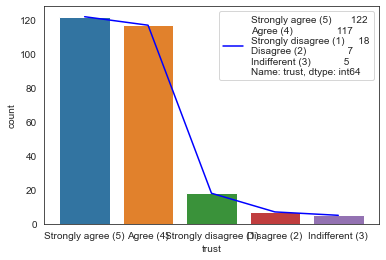

*******************************************************************************


Strongly agree (5)    111
Agree (4)              94
Indifferent (3)        57
Disagree (2)            7
Name: productSeveralCategory, dtype: int64


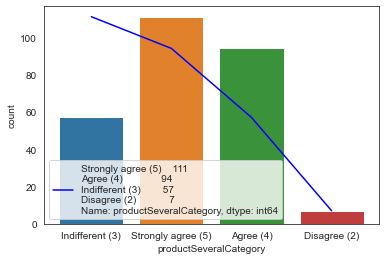

*******************************************************************************


Strongly agree (5)    135
Agree (4)              98
Indifferent (3)        31
Disagree (2)            5
Name: relevantProductInfo, dtype: int64


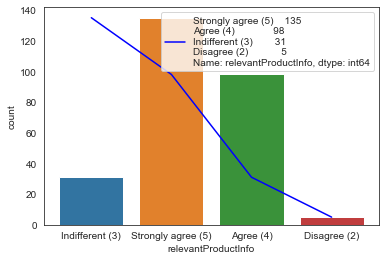

*******************************************************************************


Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
Indifferent (3)        15
Name: monetarySavings, dtype: int64


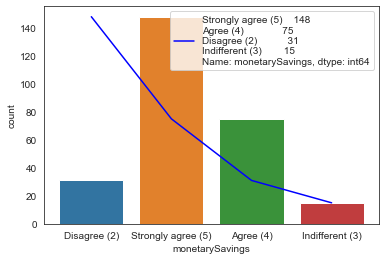

*******************************************************************************


Agree (4)             138
Indifferent (3)        77
Strongly agree (5)     54
Name: patronizingConvenience, dtype: int64


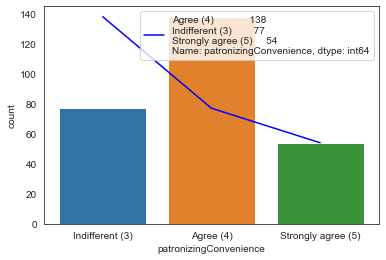

*******************************************************************************


Agree (4)                101
Indifferent (3)           59
Strongly agree (5)        54
Disagree (2)              50
Strongly disagree (1)      5
Name: adventureSense, dtype: int64


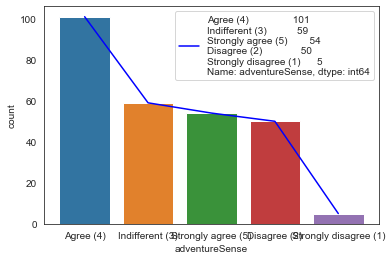

*******************************************************************************


Indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Disagree (2)              29
Name: socialStatus, dtype: int64


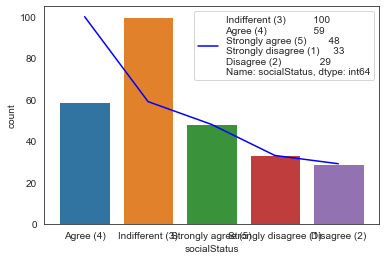

*******************************************************************************


Indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: gratification, dtype: int64


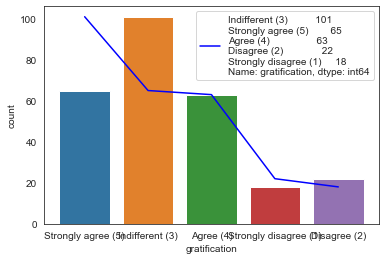

*******************************************************************************


Agree (4)                88
Indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Disagree (2)             22
Name: roleFulfilment, dtype: int64


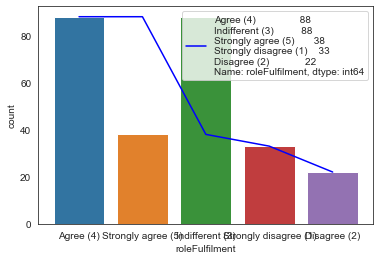

*******************************************************************************


Agree (4)             149
Strongly agree (5)     82
Indifferent (3)        38
Name: moneyWorthy, dtype: int64


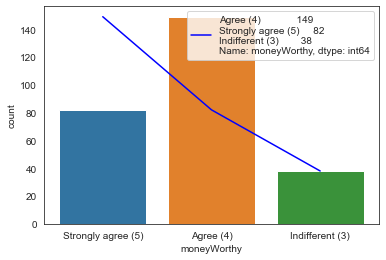

*******************************************************************************


Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: shoppedFrom, dtype: int64


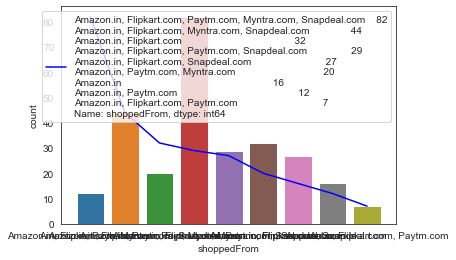

*******************************************************************************


Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: easyWebApp, dtype: int64


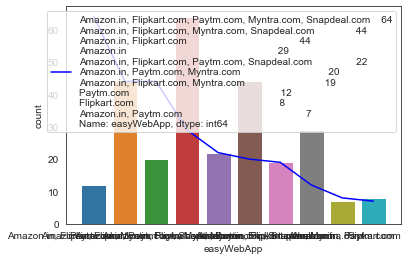

*******************************************************************************


Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: visuallyAppealingWebApp, dtype: int64


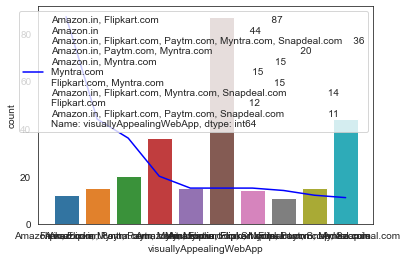

*******************************************************************************


Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: productVariety, dtype: int64


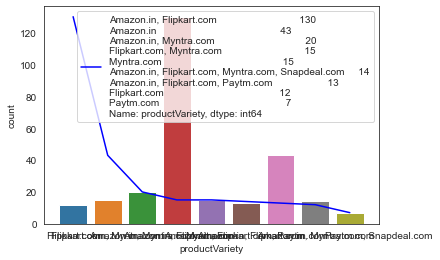

*******************************************************************************


Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: completeProductInfo, dtype: int64


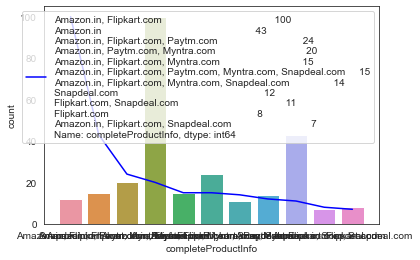

*******************************************************************************


Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: fastWebApp, dtype: int64


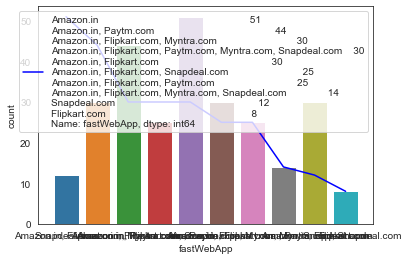

*******************************************************************************


Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: reliableWebApp, dtype: int64


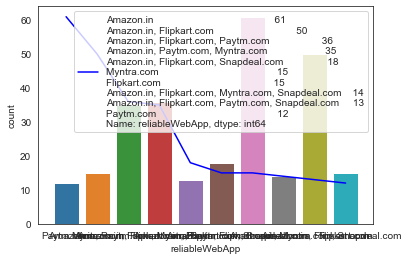

*******************************************************************************


Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: quickPurchase, dtype: int64


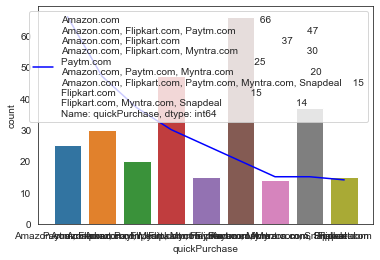

*******************************************************************************


Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: paymentOptionsAvailability, dtype: int64


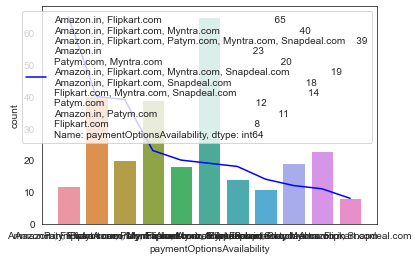

*******************************************************************************


Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: fastDelivery, dtype: int64


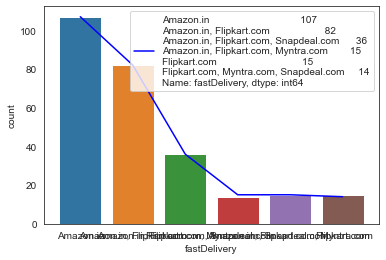

*******************************************************************************


Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: custInfoPrivacy, dtype: int64


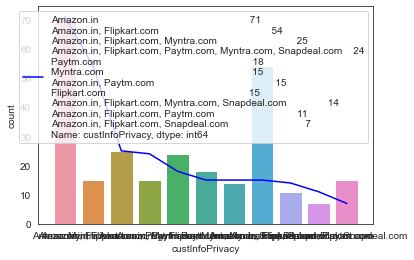

*******************************************************************************


Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: finInfoSecurity, dtype: int64


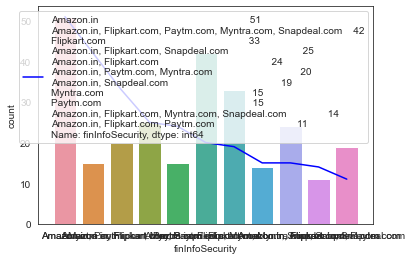

*******************************************************************************


Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: perceivedTrustworthiness, dtype: int64


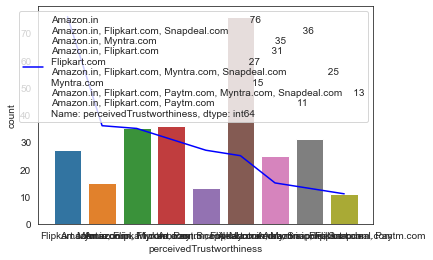

*******************************************************************************


Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: multiChannelAssistance, dtype: int64


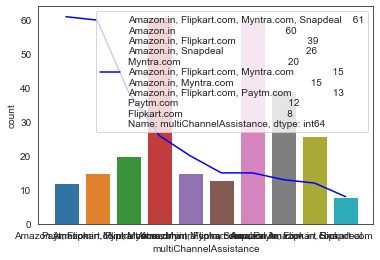

*******************************************************************************


Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: longLoginTime, dtype: int64


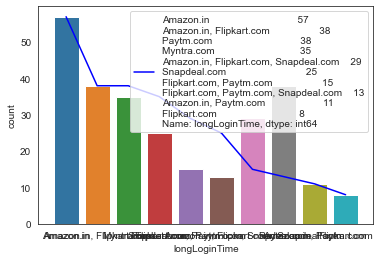

*******************************************************************************


Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: longDisplayTime, dtype: int64


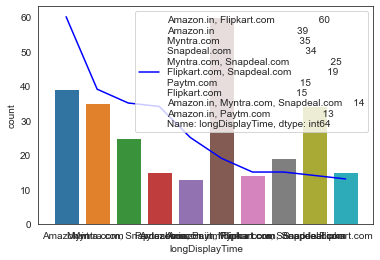

*******************************************************************************


Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: latePriceDeclare, dtype: int64


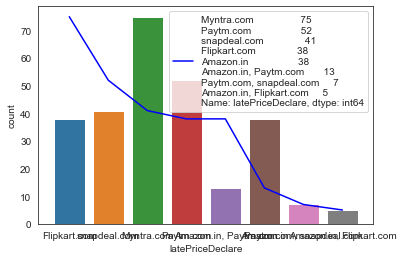

*******************************************************************************


Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: longLoadingTime, dtype: int64


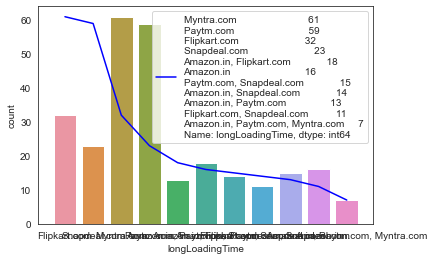

*******************************************************************************


Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: limitedPaymentMode, dtype: int64


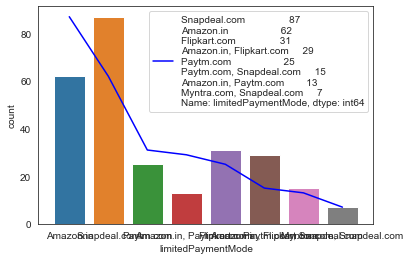

*******************************************************************************


Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: lateDelivery, dtype: int64


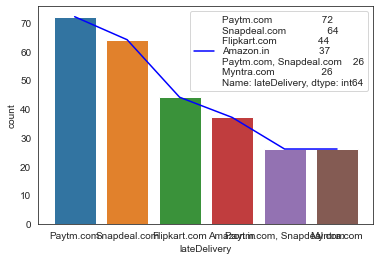

*******************************************************************************


Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: webAppDesignChange, dtype: int64


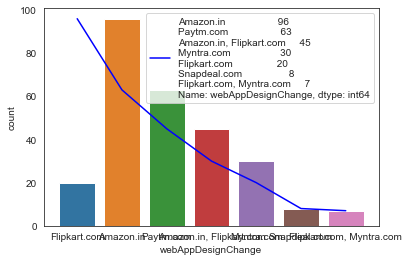

*******************************************************************************


Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: pageDisruption, dtype: int64


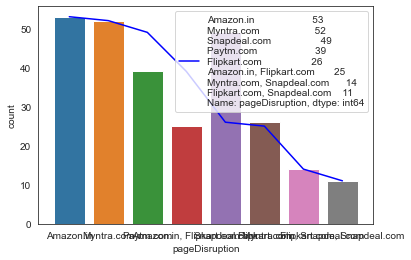

*******************************************************************************


Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: webAppEfficiency, dtype: int64


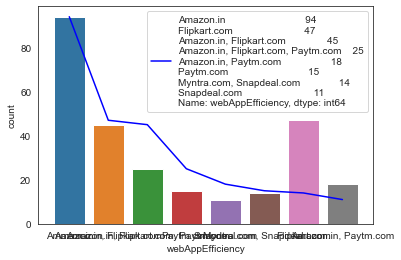

*******************************************************************************


Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: recommendation, dtype: int64


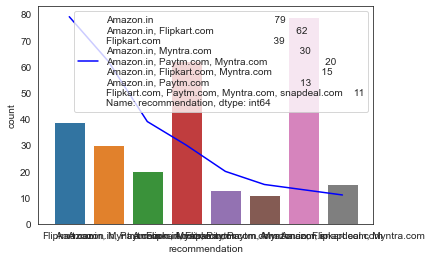

*******************************************************************************




In [21]:
def value_counts(data):
    s=df.columns
    for i in s:
        if df[i].dtype=='object':
            sns.set_style('white')  #darkgrid
            a=df[i].value_counts()
            print(a)
            sns.countplot(x=df[i],data=df)
            plt.plot(a,color='b',label=a)
            plt.legend()
            plt.show()
            print("*******************************************************************************")
            print('\n')

value_counts(df)

According to above graph we conclude that:-
1. Female customers (67%) are more than male customers.
2. Customers between 20 to 50 years shopped more from the online store, 75 % of customers are between 20 to 50 year age group.
3. Delhi, Bangalore, Noida are the cities with high number of buyers.
4. 36% customers were found shopping online for more than 4 years , 24% were shopping for 2-3 years.
5. In last one year 42% customers have purchased online less than 10 times,23% customers purchased 31-40 times only 2 percent customers purchased more than 42 times
6. 70% customers used mobile internet for online purchase
7. 52% customers used Smartphone for online purchase, 32% used laptop least 4% used tablet
8. 45% customers use Windows phone
9. 80% customers used Google chrome for online purchase
10. 86% customers uses Search engine to reach their favorite online store
11. After first visit 32 % customers used search engine to reach online store and 32% uses application. We can assume that these customers have been retained by the E commerce website as they have downloaded the application on their phone and have a fair chance of shopping again. Also, there are a few customers who are using Desktop/Laptop, for which, there are no applications for online shopping and you have to stick with the web browser.
12. 46% customers take at least 15 minutes before making a purchase, 26% take 6-10 minutes only
14. 64% customers abandon their shopping cart sometimes, 19% abandon their cart frequently.
15. 49% customers abandon their bag due to better alternative offer, 20% abandon due to promo code not applicable
16. 61% customers have strongly agreed to have easy website content which is easy to understand
17. 43% customers agree that Information on similar product to the one highlighted is important for product comparison.
18. 70% customers agree that Complete information on listed seller and product being offered is important for purchase decision
19. 90% customers agree all relevant information on listed products must be stated clearly.
20. 90% customers agreed that the website should be easily navigable
21. 85% customers had no issues with the loading and processing speed
22. 87% customers agree with user friendly website interface. The online stores should invest heavily in creating user friendly apps and websites, so that the customers do not have to work around much and the overall shopping experience is smooth.
23. 59% customers strongly agree with the convenient paying methods. The reluctance to make online payments is gradually reducing. The acceptance has been built by addressing the trust issue over time by giving customers an option to pay online or to pay Cash On Delivery (COD)
24. 52% customers trust that online store will fulfill its part of transaction at stipulated time.
25. 85% customers like the organization's readiness to assist with queries
26. Being able to guarantee the privacy of the customer: This also got 69% strongly agree. Costumers are concerned about the unauthorized access to their data. Protecting user privacy will enable stores to drive more revenue and gain more customers
27. Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.): 90% customers agreed to it. In case one channel is not available, customers can reach out to multiple channels which again is an important factor. Being able to communicate easily can make the difference in both their shopping experience as well as fulfill business goals of online store.
28. 50% agree that online shopping gives monetary benefit and discounts to the customer: Most online shopping sites offer amazing round-the-year discounts. Banks and Digital Wallets have happily jumped on the online shopping bandwagon by providing Reward Points, and instant Cashback offers in addition to brand discounts, which will help to gain new customers
29. 60% customers enjoys online shopping.
30. 84% customers agree that online shopping is convenient and flexible:
31. 90% customers agree that return and replacement policy helps them making purchase decision. It is evident from the fact that people cannot actually try & touch the products, they are purchasing before it reaches home and they would want to return or replace in case of dissatisfaction. Online shopping websites should make strategies around easy return and replacement policy if they want to retain their customers.
32. Around 50% customers agree that gaining access to loyalty program is a benefit of shopping online.
33. Displaying quality Information on the website improves satisfaction of customers: 80% customer agreed to it. It means displaying quality information have a significant association with customer satisfaction, and repurchase intentions
34. 95% customers are satisfied while shopping on a good quality website.
35. Net Benefit derived from shopping online can lead to users satisfaction:90% customers agreed.
36. User satisfaction cannot exist without trust: 85% customers agree that customer satisfaction cannot be built without trust. Trust is important factor to attract e-commerce buyers. So, it is important for companies to learn how to manage consumers' trust
37. Offering a wide variety of listed product in several categories: 75% use agreed.
38. 86% customers like to have complete and relevant information.
39. 80% customers agree to receive monetary savings while shopping online.
40. 50% agree with the convenience of patronizing the online retailer.
41. 50% customers agree that online shopping give the sense of adventure
42. only 30% customers agree that online shopping enhances their social status
43. 45% customers feel gratified while shopping with their favorite retailer
44. 45% customers feel that shopping online helps them fulfill certain roles
45. 85% customers agree they get value for their money while shopping online
45. Observations from Multiple Options based Questions i.e. related to company name specific parameters, after 47th rows
46. Maximum people have shopped from these 5 companies - Amazon.in, Flipkart.com, Paytm.com, Myntra.com, and Snapdeal.com.
47. 48% customers says flipkart, amazon shows wide variety of products
48. 37% customers like flipkart and amazon in terms of displaying complete and relevant information of the products
49. In terms of speed Amazon.in is liked by 90% customers , 60 % like Flipkart , 27% Myntra
50. 78% customers trust Amazon to be reliable , 55% likes flipkart , 25% Myntra
51. 80% customers likes Amazon's quickness to complete the purchase , 60% likes Flipart's, 30% likes Myntra's
52. 86% likes Amazon's delivery speed , 56% likes Flipkart's , 5% likes Myntra's
53. 82% customers trust amazon in terms of keeping the privacy of their data, 56% trust flipkart 20% trust Myntra , 12 % trust Snapdeal
54. 70% trust amazon in terms of keeping their financial information secured, 56% Flipakrt, 34% Myntra , 21% Snapdeal , 22@ Paytm
55. 84% customers believe Amazon perceived trustworthiness, 43% - Flipkart , 33% - Myntra ,Snapdeal 27% Snapdeal
56. 86% customers like Amazon in terms of online assistance through multi-channel , 51% -Flipkart ,42% Myntra
57. 50% customers agree that Amazon takes longer time to log them in while in sales period/promotions , 39% goes with flipkart, 13% goes with Myntra , 16% Snapdeal
58. 46% customers says that amazon takes longer time in displaying photos in sales/promotion , 35%- flipkart, 21% Snapdeal, 14% Myntra, 11% Paytm
59. In terms of late declaration of price in promotion/sales 28% goes with Myntra, 21% amazon , 16% flipkart , 18% Snapdeal, 23% Paytm
60. In terms of longer page loading in promotion/sales 26% customer goes with Myntra, 23% flipkart, 23% amazon, 24% Snapdeal
61. In terms of limited mode of payment on most products during sales period/promotions 41% goes with Snapdeal, 40% -amazon, 23% flipkart, 20% Paytm and only 3% Myntra. Hence Myntra gives most payment options during sales/promotion.
62. In terms of time taken in product delivery Paytm has highest votes of 37%, Snapdeal 24%, flipkart 16%, amazon 14% and Snapdeal and Myntra 10%. Hence Snapdeal and Myntra take minimum time for delivery among all.
63. 20% customers dislikes disruptions while moving to another page on amazon, 24% on Myntra, 27% Snapdeal, 14% Paytm, 23% Snapdeal
64. 61% customers says that amazon website is as efficient as before, 43% for flipkart, 22% for Paytm, 9% for Snapdeal
65. 81% customers would like to recommend amazon to a friend, 43% would like flipkart , 22% would like for Myntra , 9% for Paytm and least 4 % would like to recommend Snapdeal

In [22]:
def value_count(column):
    diff_count=len(data[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,hue='gender',data=data)

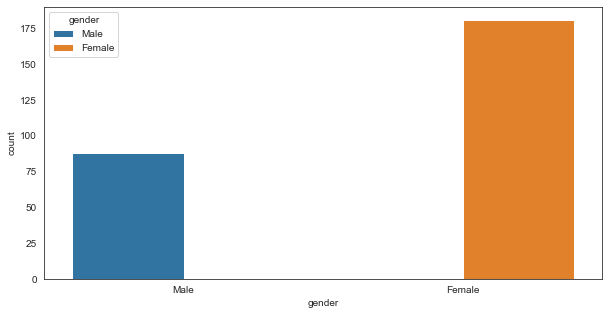

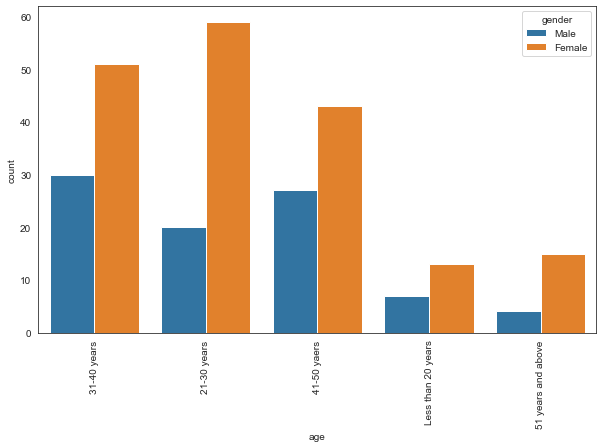

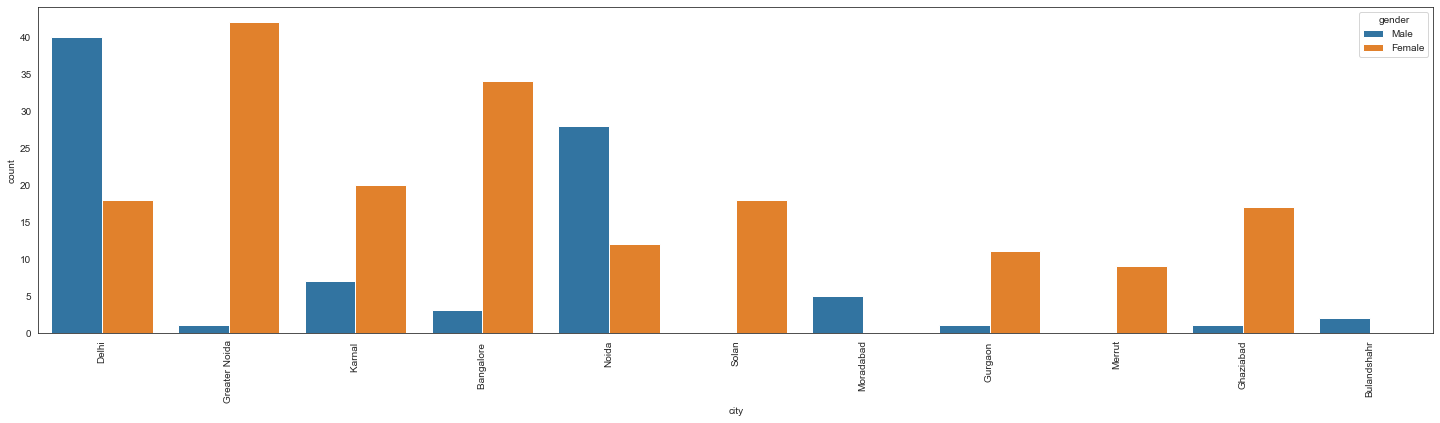

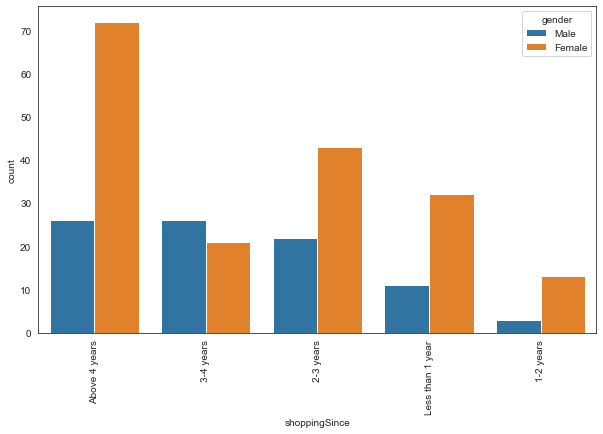

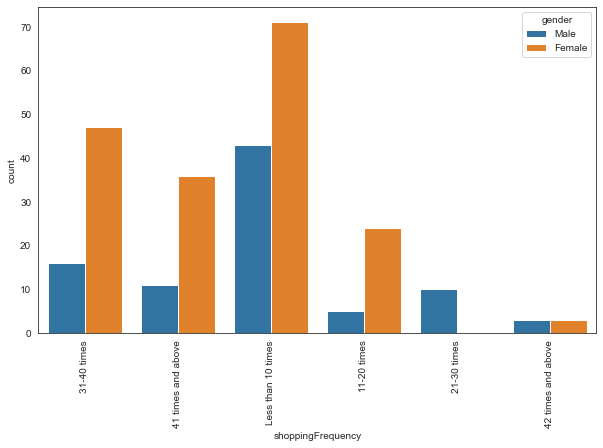

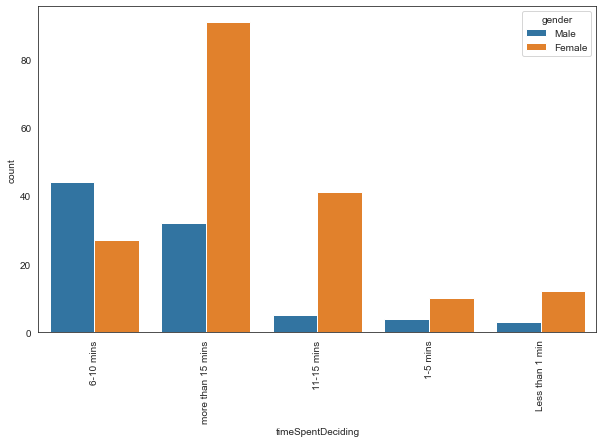

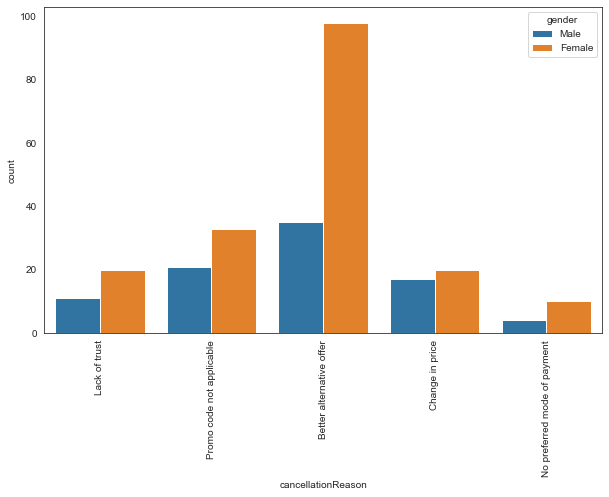

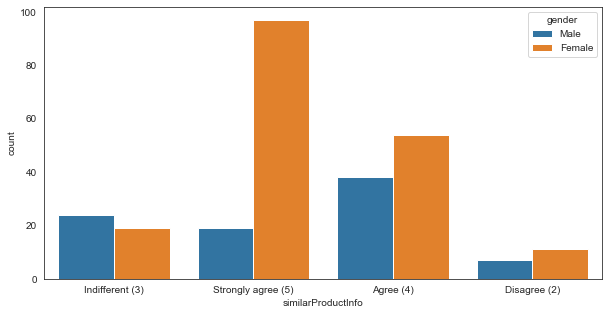

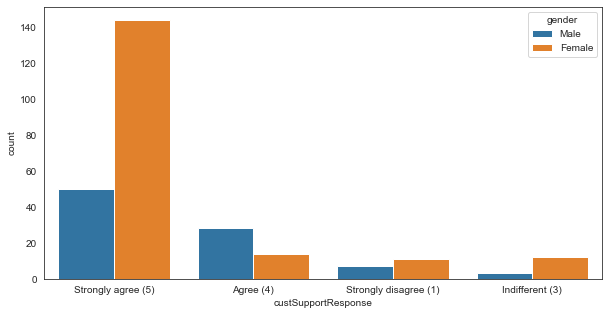

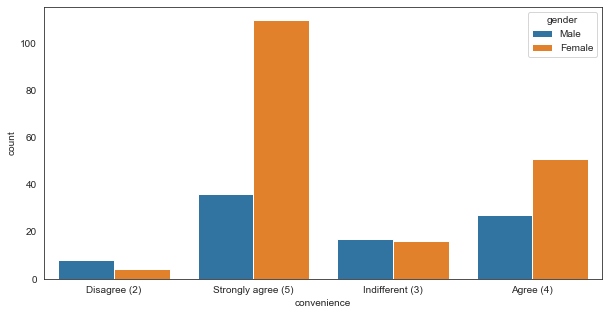

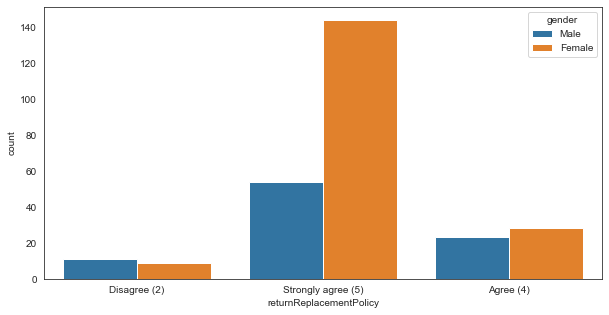

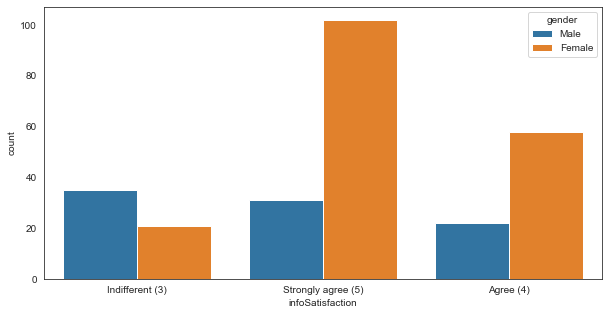

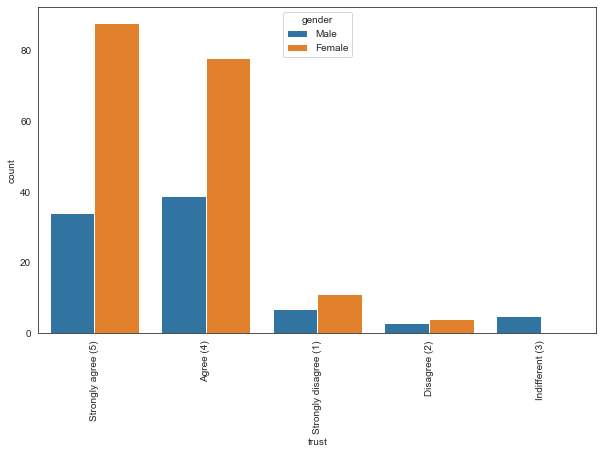

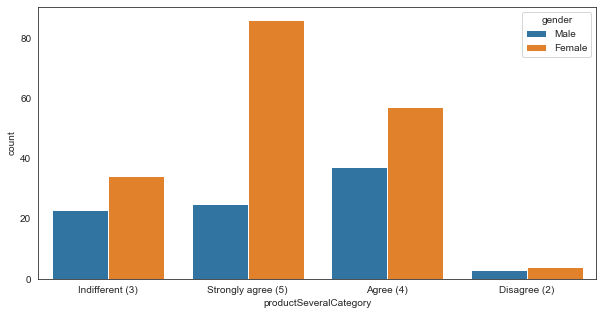

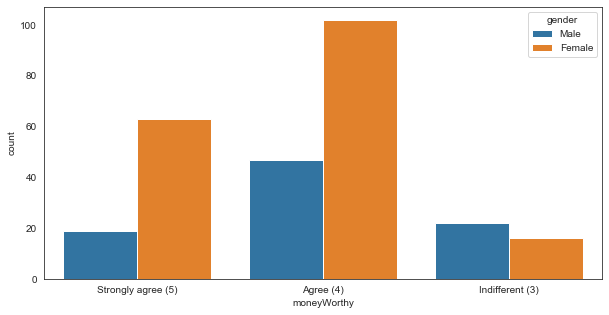

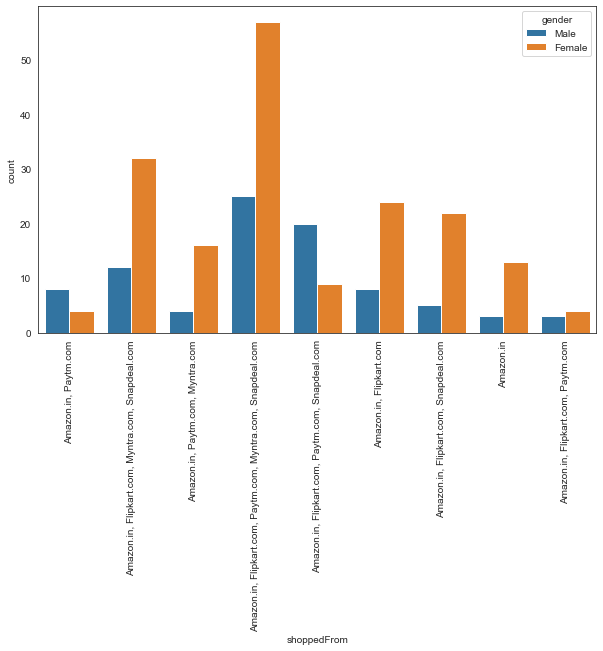

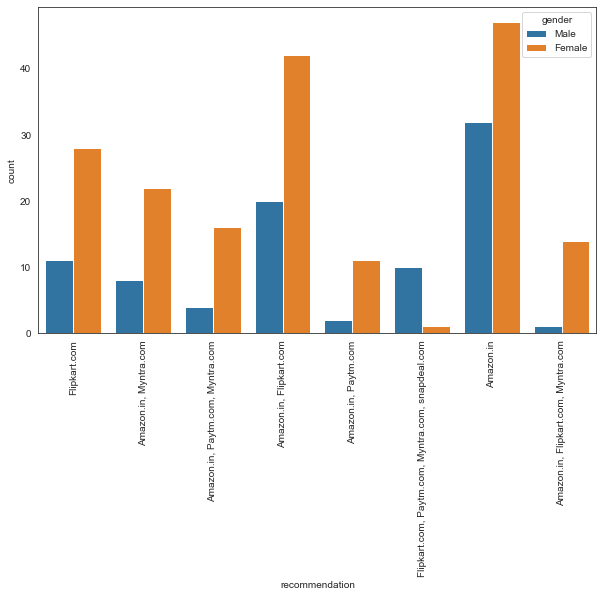

In [23]:
data=df.iloc[:,[0,1,2,4,5,13,16,18,26,31,32,34,37,38,46,47,70]]
for i in data:
    value_count(i)

Conclusion of above graphs are:-
1. Even though females are dominant in the dataset, female population using ecommerce is not dominant everywhere In Delhi and      Noida more numbers of males are using ecommerce than female.
2. Bulandshahr and Moradabad - both cities in Uttar Pradesh has no female shoppers at all.
3. Numbers of females who are shopping since long are more than number of males.
4. Frequency of females shopping online is more than males.
5. Most of the females usually take more than 15 minutes meanwhile most of the male spend 6-10 minutes before making a purchase    decision.
6. More females strongly agree with the fact that there must be similar products to compare. Males do agree with the fact but     the data suggests that it is okay if there exists a product but also okay if there does not exist one.

# Label Encoding

In [24]:
#Label encoding for the object columns
label_list=list(df.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_list:
    df[i] = le.fit_transform(df[i])

In [25]:
df

,gender,age,city,pinCode,shoppingSince,shoppingFrequency,internetAccessibility,deviceUsed,screenSize,OS,...,longLoginTime,longDisplayTime,latePriceDeclare,longLoadingTime,limitedPaymentMode,lateDelivery,webAppDesignChange,pageDisruption,webAppEfficiency,recommendation
0,1,1,2,110009,3,2,0,0,3,2,...,0,0,3,5,0,3,2,0,0,6
1,0,0,2,110030,3,3,3,2,0,1,...,1,6,7,10,7,5,0,4,1,3
2,0,0,4,201308,2,3,1,2,2,0,...,7,6,4,7,0,3,5,6,0,5
3,1,0,6,132001,2,5,1,2,2,1,...,9,7,4,8,5,3,1,1,2,1
4,0,0,0,530068,1,0,3,2,0,1,...,5,8,5,8,7,3,0,7,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,0,10,173212,0,5,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
265,0,1,3,201008,0,2,1,2,3,0,...,4,4,3,5,3,1,2,2,4,6
266,0,2,0,560010,1,5,2,1,3,2,...,0,9,0,10,7,5,6,7,0,0
267,0,4,10,173229,1,5,3,2,2,0,...,0,2,0,4,0,0,0,5,5,0


In [27]:
#Checking null values in dataset after label encoding
df.isnull().sum()

gender                0
age                   0
city                  0
pinCode               0
shoppingSince         0
                     ..
lateDelivery          0
webAppDesignChange    0
pageDisruption        0
webAppEfficiency      0
recommendation        0
Length: 71, dtype: int64

In dataset no null value find.

In [33]:
df.columns

Index(['gender', 'age', 'city', 'pinCode', 'shoppingSince',
       'shoppingFrequency', 'internetAccessibility', 'deviceUsed',
       'screenSize', 'OS', 'browserUsed', 'channelFirstUsed', 'loginMode',
       'timeSpentDeciding', 'paymentMode', 'cancellingFrequency',
       'cancellationReason', 'contentReadability', 'similarProductInfo',
       'sellerProductInfo', 'productInfoClarity', 'navigationEase',
       'loadingProcessingSpeed', 'userFrienlyInterface',
       'conveninetPaymentMode', 'timelyFulfilmentTrust', 'custSupportResponse',
       'custPrivacyGuarantee', 'variousChannelResponses', 'benefit', 'enjoy',
       'convenience', 'returnReplacementPolicy', 'loyaltyProgramsAccess',
       'infoSatisfaction', 'siteQualitySatisfaction', 'netBenefitSatisfaction',
       'trust', 'productSeveralCategory', 'relevantProductInfo',
       'monetarySavings', 'patronizingConvenience', 'adventureSense',
       'socialStatus', 'gratification', 'roleFulfilment', 'moneyWorthy',
       'shoppe

# Corelation of dataset

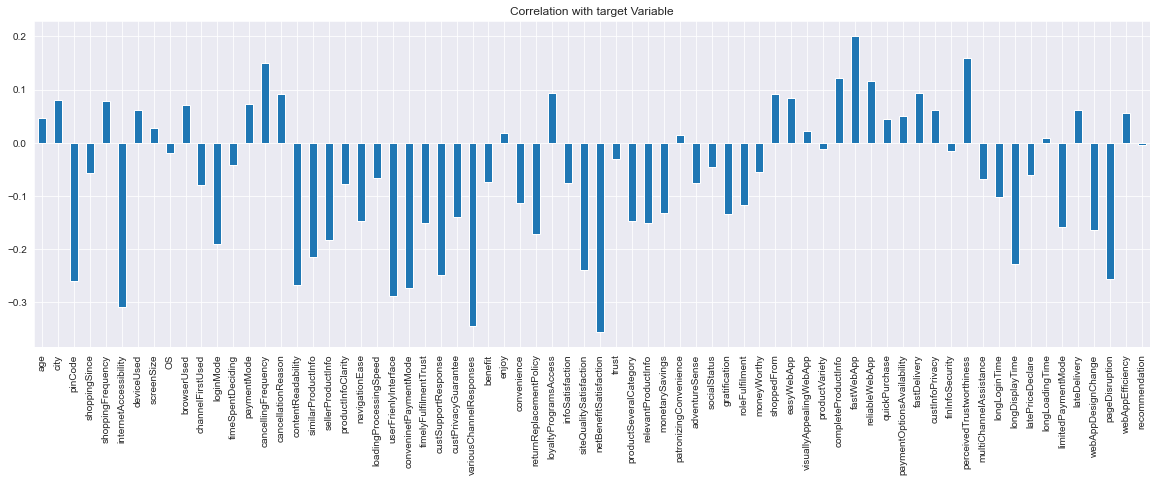

In [37]:
plt.figure(figsize=(20,6))
df.drop("gender", axis=1).corrwith(df["gender"]).plot(kind="bar")
plt.title("Correlation with target Variable")
plt.savefig("correlation_with_target.png")
plt.show()

As per above corelation grapy we conclude that:-

1. fastWebApp is highly positive corelated i.e (0.2) with target variable, netBenefitSatisfaction highly negative corelated i.e    (-0.4 approx)  with target variable.

2. Customer retention can be done, majorly with customer reviews and by finding out if they are satisfied with the quality of      product and experience delivered to them.

In [38]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  4,  16,  20,  30,  35,  49,  79,  88,  95, 112, 116, 133, 142,
       159, 162, 196, 207, 234, 237, 262], dtype=int64), array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11], dtype=int64))


In [39]:
import scipy
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(269, 71)
(249, 71)


In [42]:
new_df.dtypes

gender                int32
age                   int32
city                  int32
pinCode               int64
shoppingSince         int32
                      ...  
lateDelivery          int32
webAppDesignChange    int32
pageDisruption        int32
webAppEfficiency      int32
recommendation        int32
Length: 71, dtype: object

new_df having 'int' type as we  converted all 'object' data type while using label encoding,
Hence we don't need to remove outliers and no need to check for skewness.

# Scaling Data using StandardScaler

In [46]:
# Seperating x and y
x = df.drop("gender", axis=1)
y = df["gender"]

In [47]:
x.shape

(269, 70)

In [48]:
y.shape

(269,)

In [49]:
x

,age,city,pinCode,shoppingSince,shoppingFrequency,internetAccessibility,deviceUsed,screenSize,OS,browserUsed,...,longLoginTime,longDisplayTime,latePriceDeclare,longLoadingTime,limitedPaymentMode,lateDelivery,webAppDesignChange,pageDisruption,webAppEfficiency,recommendation
0,1,2,110009,3,2,0,0,3,2,0,...,0,0,3,5,0,3,2,0,0,6
1,0,2,110030,3,3,3,2,0,1,0,...,1,6,7,10,7,5,0,4,1,3
2,0,4,201308,2,3,1,2,2,0,0,...,7,6,4,7,0,3,5,6,0,5
3,0,6,132001,2,5,1,2,2,1,3,...,9,7,4,8,5,3,1,1,2,1
4,0,0,530068,1,0,3,2,0,1,3,...,5,8,5,8,7,3,0,7,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,10,173212,0,5,1,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
265,1,3,201008,0,2,1,2,3,0,0,...,4,4,3,5,3,1,2,2,4,6
266,2,0,560010,1,5,2,1,3,2,0,...,0,9,0,10,7,5,6,7,0,0
267,4,10,173229,1,5,3,2,2,0,0,...,0,2,0,4,0,0,0,5,5,0


In [50]:
# Using PCA
from sklearn.decomposition import PCA

In [62]:
pca=PCA(n_components=10)
X_pca=pca.fit_transform(x)

# Scalling the dataset using standard scaler

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(x)
x=pd.DataFrame(X_, columns=x.columns)

In [59]:
x

,age,city,pinCode,shoppingSince,shoppingFrequency,internetAccessibility,deviceUsed,screenSize,OS,browserUsed,...,longLoginTime,longDisplayTime,latePriceDeclare,longLoadingTime,limitedPaymentMode,lateDelivery,webAppDesignChange,pageDisruption,webAppEfficiency,recommendation
0,-0.280013,-0.783977,-0.787498,0.576221,-0.713047,-2.908068,-2.002898,0.788282,0.995479,-0.478277,...,-1.212050,-1.281109,-0.401985,-0.346963,-1.305101,0.153218,-0.088257,-1.405192,-0.984697,1.527278
1,-1.126343,-0.783977,-0.787348,0.576221,-0.137042,1.290163,0.664328,-2.392435,-0.158762,-0.478277,...,-0.912380,0.610666,1.503458,1.407417,1.152404,1.314223,-1.019284,0.161634,-0.523228,0.255334
2,-1.126343,-0.155393,-0.136585,-0.275446,-0.137042,-1.508658,0.664328,-0.271957,-1.313002,-0.478277,...,0.885643,0.610666,0.074376,0.354789,-1.305101,0.153218,1.308284,0.945047,-0.984697,1.103297
3,-1.126343,0.473190,-0.630707,-0.275446,1.014968,-1.508658,0.664328,-0.271957,-0.158762,2.259094,...,1.484984,0.925962,0.074376,0.705665,0.450260,0.153218,-0.553771,-1.013486,-0.061758,-0.592628
4,-1.126343,-1.412561,2.207300,-1.127113,-1.865058,1.290163,0.664328,-2.392435,-0.158762,2.259094,...,0.286302,1.241258,0.550737,0.705665,1.152404,0.153218,-1.019284,1.336753,1.784121,0.255334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-1.126343,1.730357,-0.336894,-1.978780,1.014968,-1.508658,0.664328,-0.271957,-1.313002,1.346637,...,-1.212050,-1.281109,-1.831067,-2.101343,-1.305101,-1.588289,-1.019284,-1.405192,-0.984697,-1.016609
265,-0.280013,-0.469685,-0.138723,-1.978780,-0.713047,-1.508658,0.664328,0.788282,-1.313002,-0.478277,...,-0.013368,-0.019926,-0.401985,-0.346963,-0.251884,-1.007786,-0.088257,-0.621779,0.861181,1.527278
266,0.566318,-1.412561,2.420770,-1.127113,1.014968,-0.109248,-0.669285,0.788282,0.995479,-0.478277,...,-1.212050,1.556553,-1.831067,1.407417,1.152404,1.314223,1.773797,1.336753,-0.984697,-1.016609
267,2.258979,1.730357,-0.336773,-1.127113,1.014968,1.290163,0.664328,-0.271957,-1.313002,-0.478277,...,-1.212050,-0.650517,-1.831067,-0.697839,-1.305101,-1.588289,-1.019284,0.553340,1.322651,-1.016609


# Splitting the data for training and testing

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.9382716049382716  on Random_state  47


After, Splitting the data we conclude the best accuracy is 93.82% on random state 47.

# Modal Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
#importing all the required libraries to find best Algorithm
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3)]
for m in model:
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
        m.fit(x_train,y_train)
        predrf = m.predict(x_test)
        acc = accuracy_score(y_test, predrf)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
    
    print("Best accuracy is",maxAccu," on Random_state ",maxRS, "for model ", m)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
        
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("*******************************************************************************")

Best accuracy is 0.9382716049382716  on Random_state  47 for model  LogisticRegression()
*******************************************************************************
accuracy score of -> LogisticRegression()
0.9382716049382716
[[57  1]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.95      0.83      0.88        23

    accuracy                           0.94        81
   macro avg       0.94      0.90      0.92        81
weighted avg       0.94      0.94      0.94        81

[0.74074074 0.83333333 0.98148148 0.85185185 0.90566038]
0.8626135569531795
Difference between Accuracy score and cross validatio score is -  0.07565804798509201
*******************************************************************************
Best accuracy is 0.9135802469135802  on Random_state  38 for model  KNeighborsClassifier()
*******************************************************************************
accuracy sc

Model Building conclusion:- 
Decision Tree Classifier is the best model with the accuracy of 100%.

# Hyper Parameter Tuning

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=63)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[48  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        33

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



Hyper parameter tuning gives a 100% accuracy.

# AUC ROC curve

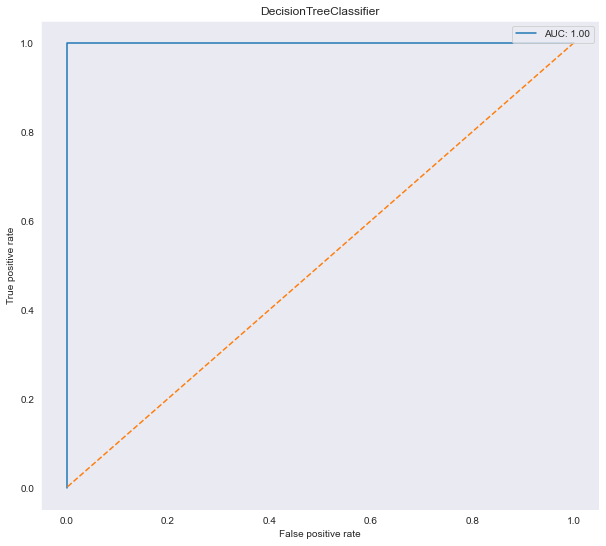

In [67]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,preddtc) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

# Saving Model

In [68]:
import joblib
joblib.dump(dtc,"Customer_Retention.obj")
RF_from_joblib=joblib.load('Customer_Retention.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

# Conclusion:
    